In [1]:
from scipy.stats import norm, cauchy, logistic
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Zadanie 1

In [2]:
def est_1(theta_hat):
    return theta_hat.mean()

def est_2(theta_hat):
    return np.median(theta_hat)

def est_3(theta_hat, weights_unbiased_3):
    weights_3 = weights_unbiased_3 / weights_unbiased_3.sum()
    return np.sum(weights_3 * theta_hat)

_weight_4_cache = {}

def weight_4_gen(i, n):
    return norm.pdf(norm.ppf((i - 1) / n)) - norm.pdf(norm.ppf(i / n))

def get_weights_4(n):
    if n not in _weight_4_cache:
        _weight_4_cache[n] = np.array([weight_4_gen(i, n) for i in range(1, n + 1)])
    return _weight_4_cache[n]

def est_4(theta_hat, n):
    theta_hat_sorted = np.sort(theta_hat)
    weights_4 = get_weights_4(n)  # Use cached weights
    return np.sum(theta_hat_sorted * weights_4)

def est_5(theta_hat, n):
    return n / np.sum(1 / theta_hat)

def est_6(theta_hat):
    return np.cbrt(np.sum(theta_hat ** 3) / len(theta_hat))

def est_7(theta_hat):
    return np.power(np.sum(theta_hat ** 2) / len(theta_hat), 1/2)

def calculate_statistics(results_df, true_theta):
    """
    Calculate variance, bias, and MSE for each estimator

    Variance: Var(θ̂) = E[(θ̂ - E[θ̂])²]
    Bias: Bias(θ̂) = E[θ̂] - θ
    MSE: MSE(θ̂) = Var(θ̂) + Bias²(θ̂)
    """
    stats = {}
    for col in results_df.columns:
        estimates = results_df[col].values

        # Variance
        variance = np.var(estimates, ddof=1)

        # Bias
        bias = np.mean(estimates) - true_theta

        # MSE
        mse = variance + bias**2

        stats[col] = {
            'Variance': variance,
            'Bias': bias,
            'MSE': mse
        }

    stats_df = pd.DataFrame(stats)
    return stats_df

def run_simulation(theta, sigma, n, num_simulations=10000, exclude_est5=False):
    """
    Run simulation for given parameters and return results with statistics
    """
    weights_unbiased_3 = np.random.rand(n)

    num_estimators = 6 if exclude_est5 else 7
    res = np.empty((num_simulations, num_estimators))

    for i in range(num_simulations):
        theta_hat = norm.rvs(theta, sigma, n)

        if exclude_est5:
            res[i] = [
                est_1(theta_hat),
                est_2(theta_hat),
                est_3(theta_hat, weights_unbiased_3),
                est_4(theta_hat, n),
                est_6(theta_hat),
                est_7(theta_hat)
            ]
        else:
            res[i] = [
                est_1(theta_hat),
                est_2(theta_hat),
                est_3(theta_hat, weights_unbiased_3),
                est_4(theta_hat, n),
                est_5(theta_hat, n),
                est_6(theta_hat),
                est_7(theta_hat)
            ]

    if exclude_est5:
        columns = ['Est1', 'Est2', 'Est3', 'Est4', 'Est6', 'Est7']
    else:
        columns = ['Est1', 'Est2', 'Est3', 'Est4', 'Est5', 'Est6', 'Est7']

    res_df = pd.DataFrame(res, columns=columns)
    stats_df = calculate_statistics(res_df, theta)

    return res_df, stats_df

## Initial exploration with θ=0, σ=1, n=50

In [4]:
theta = 0
sigma = 1
n = 50

res_df, stats_df = run_simulation(theta, sigma, n, num_simulations=1000, exclude_est5=False)

print(f"### Wartosci z estymatorem 5 dla θ={theta}, σ={sigma}, n={n}")
print(stats_df.to_markdown())

### Wartosci z estymatorem 5 dla θ=0, σ=1, n=50
|          |        Est1 |        Est2 |      Est3 |      Est4 |       Est5 |       Est6 |      Est7 |
|:---------|------------:|------------:|----------:|----------:|-----------:|-----------:|----------:|
| Variance | 0.0181151   | 0.0288677   | 0.0250964 | 0.0103446 | 589.677    | 0.508841   | 0.0105745 |
| Bias     | 0.000992828 | 0.000743846 | 0.0029383 | 0.971757  |  -0.673851 | 0.00786382 | 0.994874  |
| MSE      | 0.0181161   | 0.0288683   | 0.0251051 | 0.954656  | 590.131    | 0.508903   | 1.00035   |


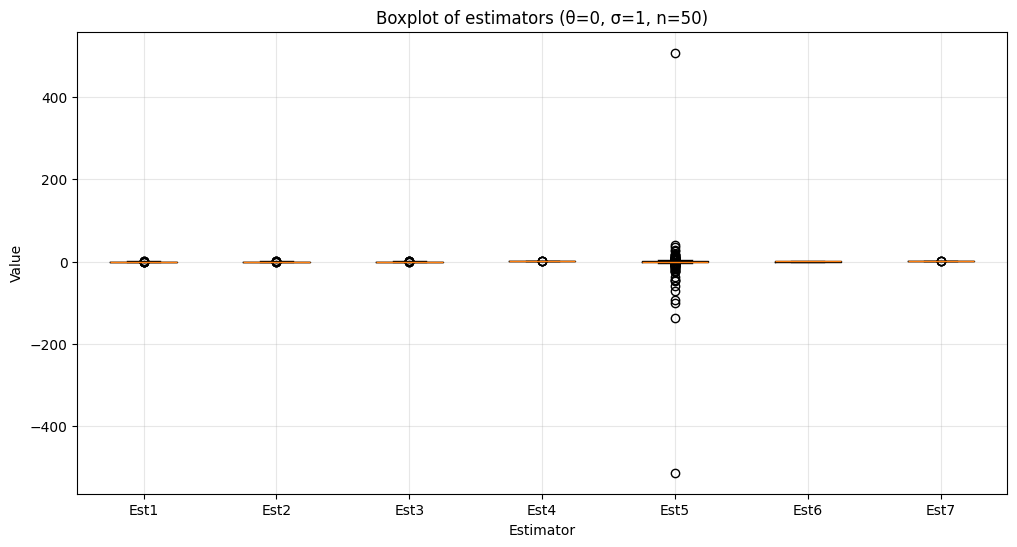

In [5]:
plt.figure(figsize=(12, 6))
plt.boxplot(res_df)
plt.title(f'Boxplot estymatorow z estymatorem 5 (θ={theta}, σ={sigma}, n={n})')
plt.xlabel('Estymator')
plt.ylabel('Wartosc')
plt.gca().set_xticklabels(res_df.columns)
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
# Without estimator 5 (harmonic mean - causes issues with values near 0)
res_df_no5, stats_df_no5 = run_simulation(theta, sigma, n, num_simulations=1000, exclude_est5=True)

print(f"\n###Wartosci bez estymatora 5 dla θ={theta}, σ={sigma}, n={n}")
print(stats_df_no5.to_markdown())


Statistics without θ̂₅ for θ=0, σ=1, n=50
      Variance      Bias       MSE
Est1  0.020025 -0.000077  0.020025
Est2  0.031063  0.000798  0.031064
Est3  0.025581 -0.001012  0.025582
Est4  0.010073  0.973143  0.957081
Est6  0.518142  0.010209  0.518246
Est7  0.010441  0.996984  1.004419


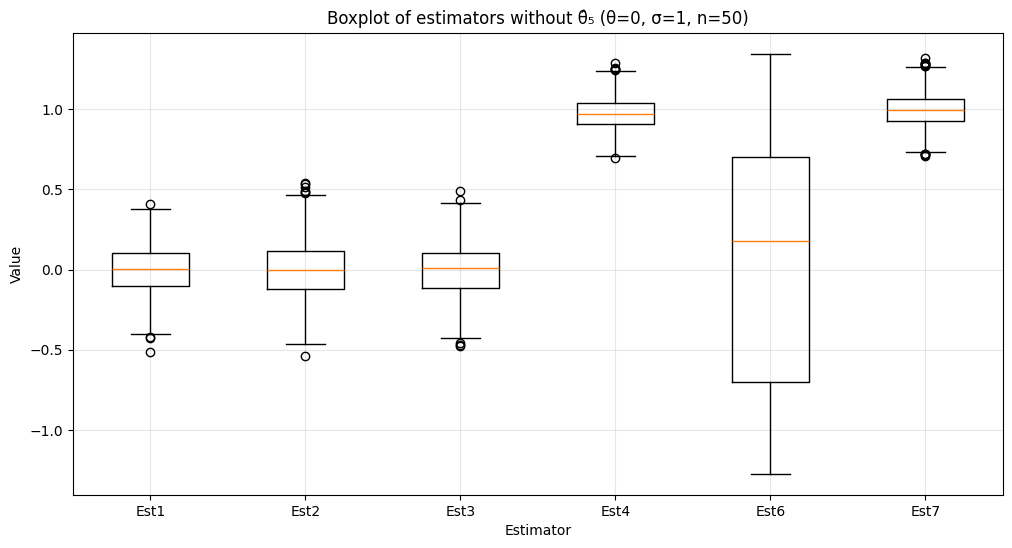

In [12]:
plt.figure(figsize=(12, 6))
plt.boxplot(res_df_no5)
plt.title(f'Boxplot estymatorow bez estymatora 5 (θ={theta}, σ={sigma}, n={n})')
plt.xlabel('Estymator')
plt.ylabel('Wartosc')
plt.gca().set_xticklabels(res_df_no5.columns)
plt.grid(True, alpha=0.3)
plt.show()


## Complete analysis for different n, θ, and σ combinations

### Wartosci dla n=20, θ=0, σ=1
|          |    Est1 |    Est2 |    Est3 |   Est4 |    Est6 |   Est7 |
|:---------|--------:|--------:|--------:|-------:|--------:|-------:|
| Variance |  0.0503 |  0.0739 |  0.0627 | 0.0234 |  0.6828 | 0.025  |
| Bias     | -0.0054 | -0.0038 | -0.0042 | 0.931  | -0.0196 | 0.987  |
| MSE      |  0.0503 |  0.0739 |  0.0627 | 0.8901 |  0.6832 | 0.9993 |


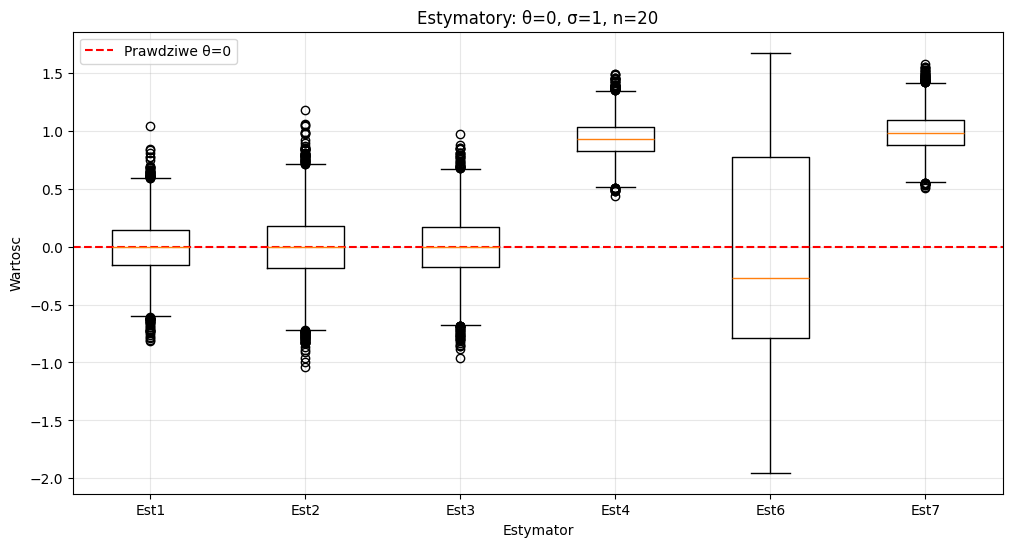

### Wartosci dla n=20, θ=0, σ=2
|          |   Est1 |   Est2 |   Est3 |   Est4 |   Est6 |   Est7 |
|:---------|-------:|-------:|-------:|-------:|-------:|-------:|
| Variance | 0.2036 | 0.2937 | 0.2659 | 0.0911 | 2.7594 | 0.0968 |
| Bias     | 0.0029 | 0.0023 | 0.0058 | 1.8636 | 0.0161 | 1.9767 |
| MSE      | 0.2036 | 0.2937 | 0.266  | 3.5643 | 2.7596 | 4.004  |


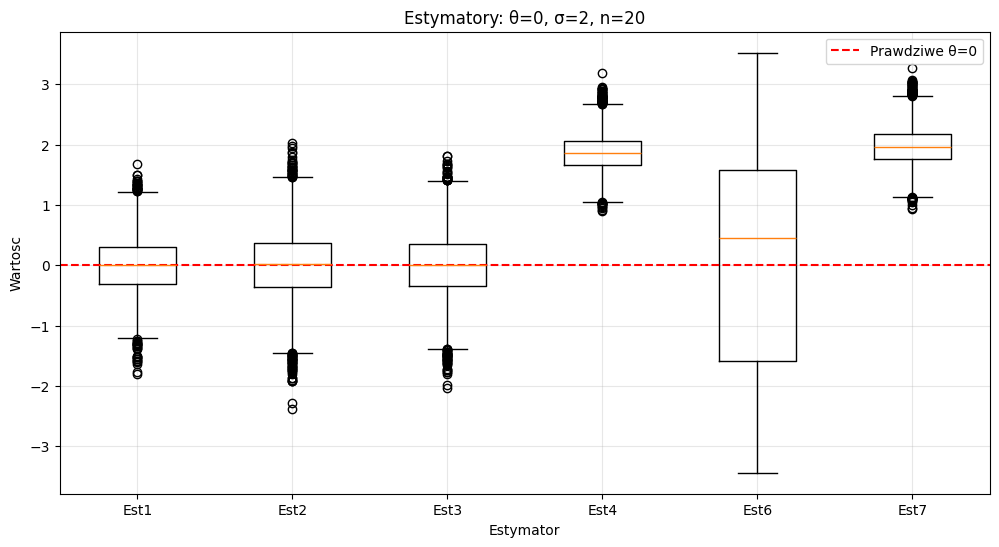

### Wartosci dla n=20, θ=4, σ=1
|          |   Est1 |   Est2 |   Est3 |    Est4 |   Est6 |   Est7 |
|:---------|-------:|-------:|-------:|--------:|-------:|-------:|
| Variance | 0.0508 | 0.0743 | 0.061  |  0.0237 | 0.0514 | 0.0498 |
| Bias     | 0.0011 | 0.0027 | 0.0019 | -3.0681 | 0.2251 | 0.1183 |
| MSE      | 0.0508 | 0.0743 | 0.061  |  9.4367 | 0.1021 | 0.0638 |


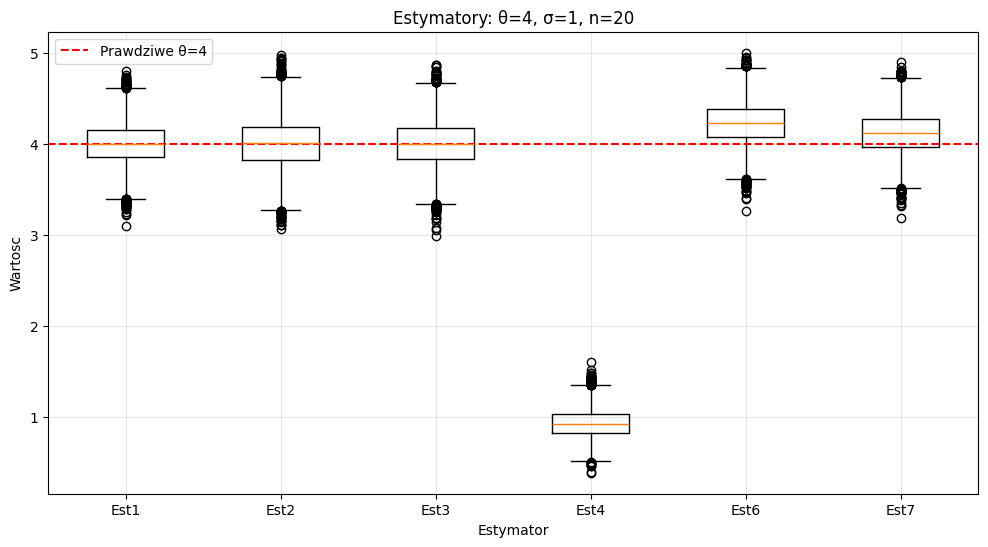

### Wartosci dla n=20, θ=4, σ=2
|          |    Est1 |    Est2 |    Est3 |    Est4 |   Est6 |   Est7 |
|:---------|--------:|--------:|--------:|--------:|-------:|-------:|
| Variance |  0.1977 |  0.2929 |  0.2377 |  0.0923 | 0.1906 | 0.1747 |
| Bias     | -0.0057 | -0.0018 | -0.0058 | -2.1347 | 0.7753 | 0.4479 |
| MSE      |  0.1977 |  0.2929 |  0.2377 |  4.6491 | 0.7917 | 0.3753 |


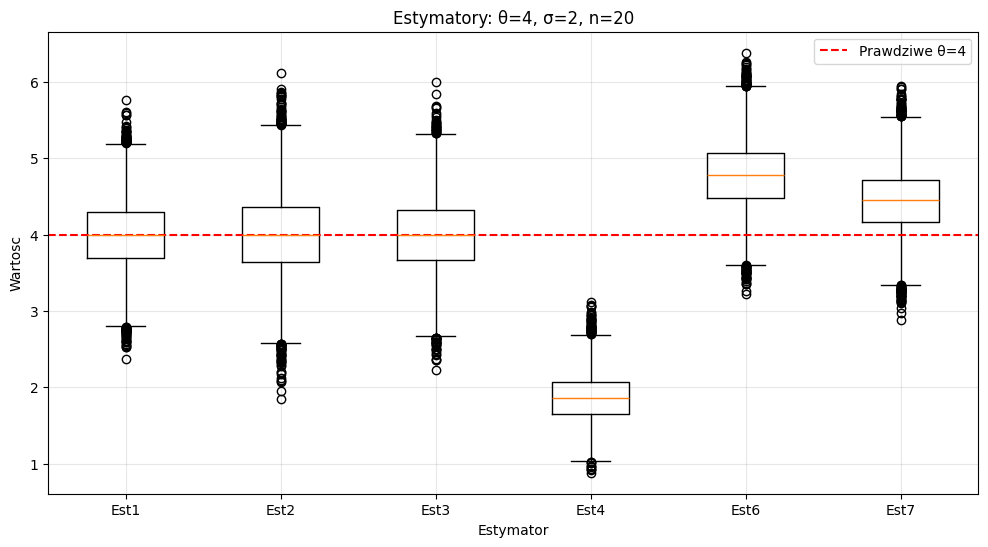

### Wartosci dla n=50, θ=0, σ=1
|          |   Est1 |   Est2 |   Est3 |   Est4 |   Est6 |   Est7 |
|:---------|-------:|-------:|-------:|-------:|-------:|-------:|
| Variance | 0.02   | 0.0297 | 0.0244 | 0.0094 | 0.5257 | 0.0097 |
| Bias     | 0.0028 | 0.0027 | 0.0032 | 0.9719 | 0.0168 | 0.996  |
| MSE      | 0.02   | 0.0297 | 0.0244 | 0.9541 | 0.526  | 1.0018 |


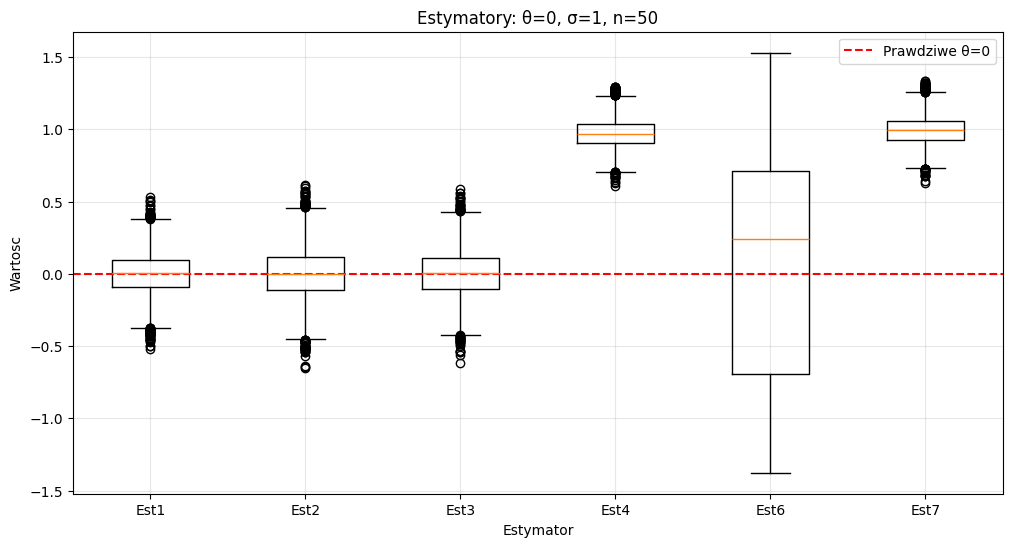

### Wartosci dla n=50, θ=0, σ=2
|          |    Est1 |   Est2 |    Est3 |   Est4 |    Est6 |   Est7 |
|:---------|--------:|-------:|--------:|-------:|--------:|-------:|
| Variance |  0.0792 | 0.1203 |  0.0964 | 0.0383 |  2.0882 | 0.0392 |
| Bias     | -0      | 0.0042 | -0.0011 | 1.9426 | -0.0027 | 1.9904 |
| MSE      |  0.0792 | 0.1203 |  0.0964 | 3.8119 |  2.0883 | 4.001  |


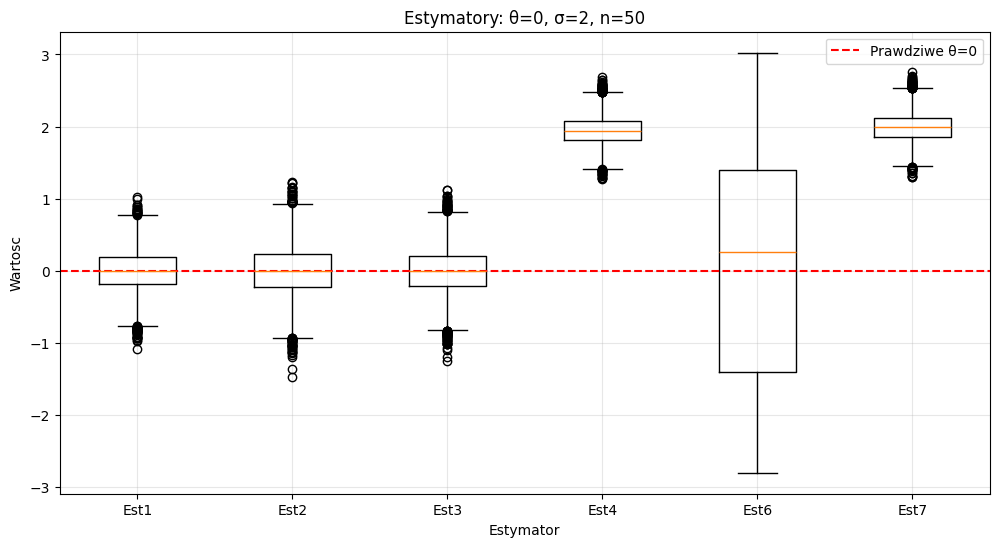

### Wartosci dla n=50, θ=4, σ=1
|          |    Est1 |    Est2 |    Est3 |    Est4 |   Est6 |   Est7 |
|:---------|--------:|--------:|--------:|--------:|-------:|-------:|
| Variance |  0.02   |  0.0307 |  0.0251 |  0.0096 | 0.02   | 0.0194 |
| Bias     | -0.0002 | -0.0021 | -0.0006 | -3.028  | 0.2314 | 0.1208 |
| MSE      |  0.02   |  0.0307 |  0.0251 |  9.1784 | 0.0735 | 0.034  |


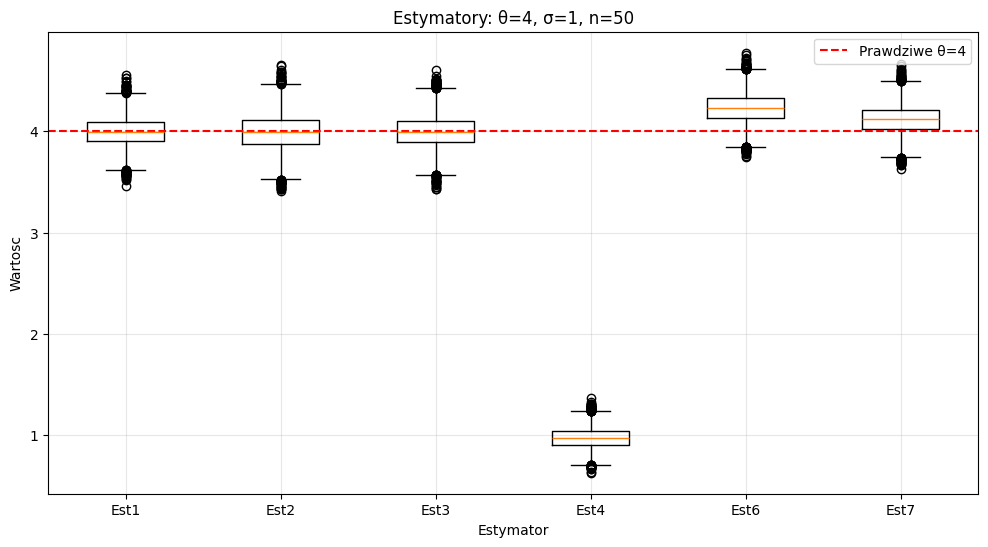

### Wartosci dla n=50, θ=4, σ=2
|          |    Est1 |    Est2 |    Est3 |    Est4 |   Est6 |   Est7 |
|:---------|--------:|--------:|--------:|--------:|-------:|-------:|
| Variance |  0.0805 |  0.1232 |  0.1073 |  0.0384 | 0.0806 | 0.0729 |
| Bias     | -0.0002 | -0.0045 | -0.0022 | -2.0591 | 0.8035 | 0.4634 |
| MSE      |  0.0805 |  0.1232 |  0.1073 |  4.2784 | 0.7262 | 0.2876 |


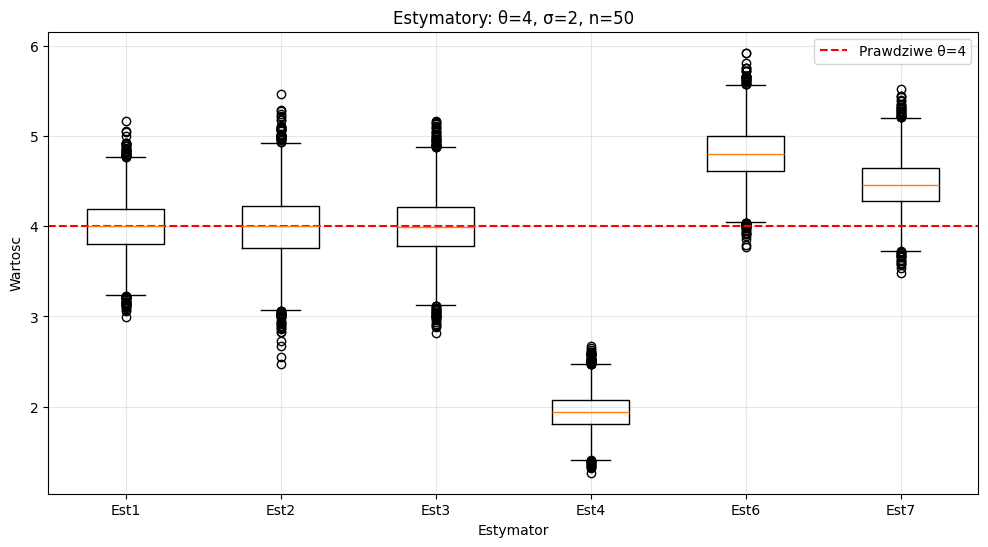

### Wartosci dla n=100, θ=0, σ=1
|          |   Est1 |   Est2 |   Est3 |   Est4 |   Est6 |   Est7 |
|:---------|-------:|-------:|-------:|-------:|-------:|-------:|
| Variance | 0.0102 | 0.0155 | 0.0137 | 0.0049 | 0.423  | 0.005  |
| Bias     | 0.001  | 0.0014 | 0.0006 | 0.9842 | 0.0036 | 0.9969 |
| MSE      | 0.0102 | 0.0155 | 0.0137 | 0.9735 | 0.423  | 0.9989 |


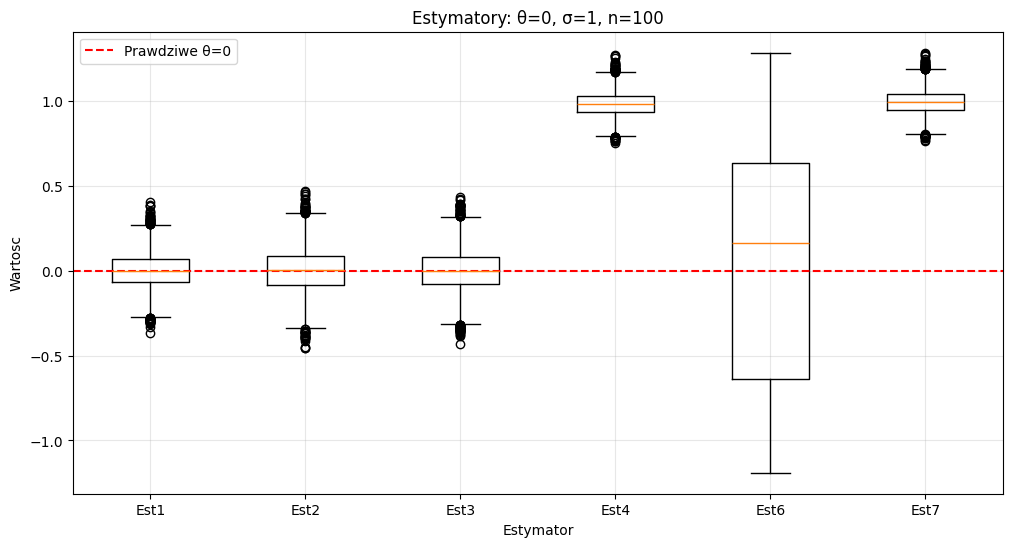

### Wartosci dla n=100, θ=0, σ=2
|          |   Est1 |   Est2 |   Est3 |   Est4 |   Est6 |   Est7 |
|:---------|-------:|-------:|-------:|-------:|-------:|-------:|
| Variance | 0.04   | 0.0623 | 0.0558 | 0.0199 | 1.6798 | 0.0201 |
| Bias     | 0.0056 | 0.0052 | 0.0058 | 1.9724 | 0.0368 | 1.9976 |
| MSE      | 0.0401 | 0.0623 | 0.0559 | 3.9103 | 1.6812 | 4.0105 |


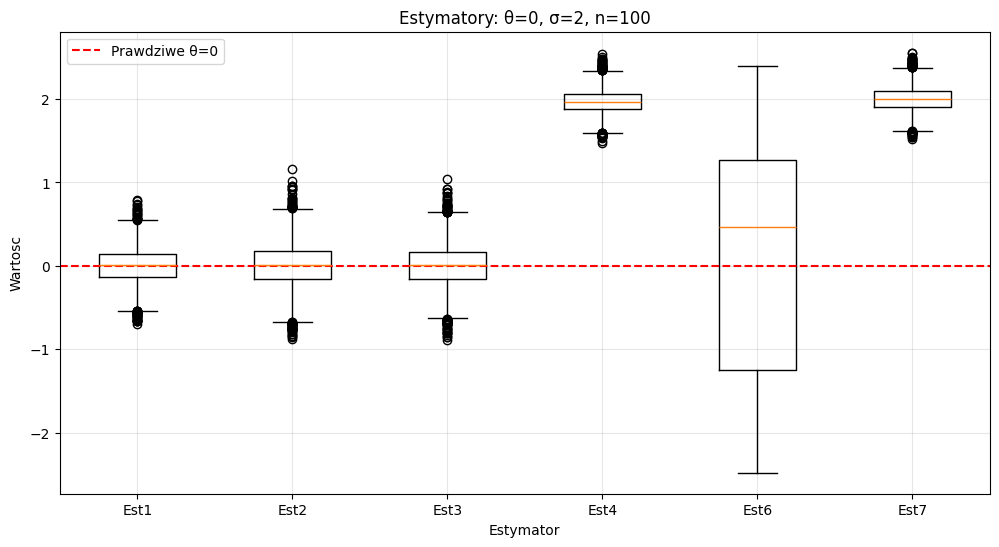

### Wartosci dla n=100, θ=4, σ=1
|          |    Est1 |    Est2 |    Est3 |    Est4 |   Est6 |   Est7 |
|:---------|--------:|--------:|--------:|--------:|-------:|-------:|
| Variance |  0.0104 |  0.0161 |  0.0133 |  0.0049 | 0.0103 | 0.0101 |
| Bias     | -0.0018 | -0.0015 | -0.0013 | -3.0149 | 0.2318 | 0.1202 |
| MSE      |  0.0104 |  0.0161 |  0.0133 |  9.0946 | 0.064  | 0.0245 |


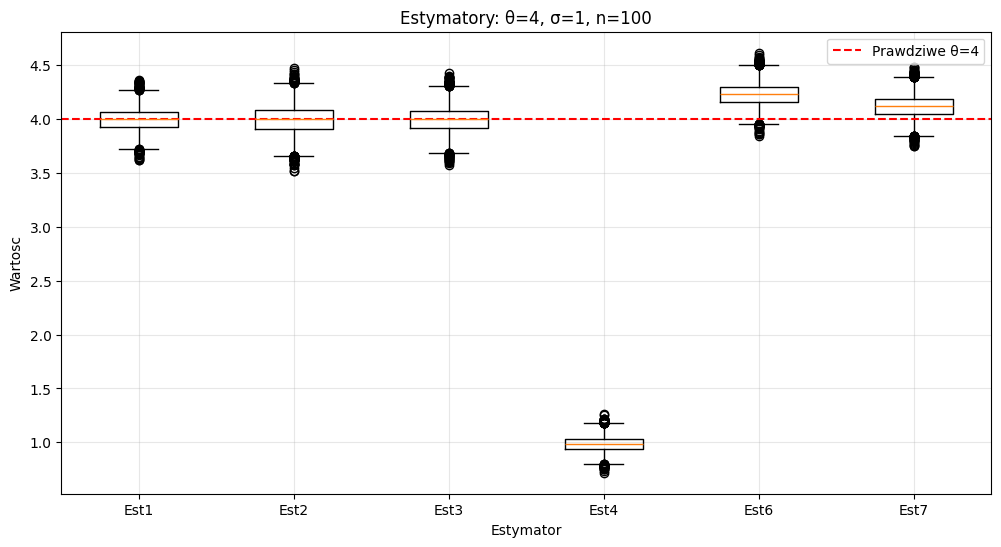

### Wartosci dla n=100, θ=4, σ=2
|          |   Est1 |   Est2 |   Est3 |    Est4 |   Est6 |   Est7 |
|:---------|-------:|-------:|-------:|--------:|-------:|-------:|
| Variance | 0.0408 | 0.0632 | 0.0521 |  0.0197 | 0.0413 | 0.0371 |
| Bias     | 0.0017 | 0.0029 | 0.0022 | -2.0288 | 0.814  | 0.4703 |
| MSE      | 0.0408 | 0.0632 | 0.0521 |  4.1356 | 0.7039 | 0.2583 |


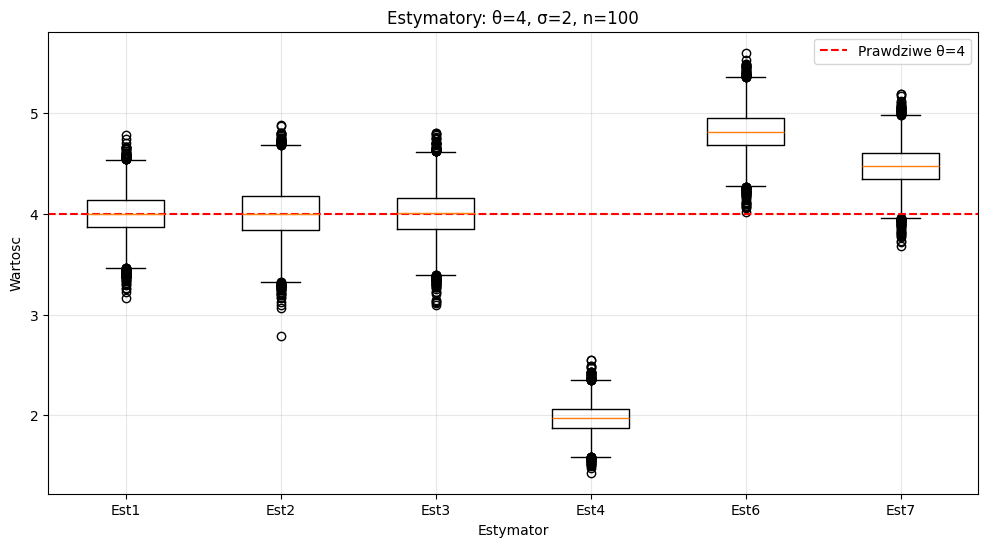

In [7]:
ns = [20, 50, 100]
thetas = [0, 0, 4, 4]
sigmas = [1, 2, 1, 2]

for n in ns:
    for i in range(4):
        theta, sigma = thetas[i], sigmas[i]

        print(f"### Wartosci dla n={n}, θ={theta}, σ={sigma}")

        res_df, stats_df = run_simulation(theta, sigma, n, num_simulations=10000, exclude_est5=True)

        print(stats_df.round(4).to_markdown())


        # Plot boxplot
        plt.figure(figsize=(12, 6))
        plt.boxplot(res_df)
        plt.title(f'Estymatory: θ={theta}, σ={sigma}, n={n}')
        plt.xlabel('Estymator')
        plt.ylabel('Wartosc')
        plt.axhline(y=theta, color='r', linestyle='--', label=f'Prawdziwe θ={theta}')
        plt.gca().set_xticklabels(res_df.columns)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()


# Zadanie 2

In [8]:
def calculate_statistics_dist(results_df, true_theta):
    """Calculate statistics for distribution comparison"""
    stats = {}
    for col in results_df.columns:
        estimates = results_df[col].values
        variance = np.var(estimates, ddof=1)
        bias = np.mean(estimates) - true_theta
        mse = variance + bias**2

        stats[col] = {
            'Mean': np.mean(estimates),
            'Variance': variance,
            'Bias': bias,
            'MSE': mse
        }

    return pd.DataFrame(stats).T

def run_distribution_comparison(theta, sigma, n, num_simulations=10000):
    """Compare mean and median estimators across different distributions"""
    res_norm = []
    res_cauchy = []
    res_logistic = []

    for _ in range(num_simulations):
        norm_vector = norm.rvs(loc=theta, scale=sigma, size=n)
        cauchy_vector = cauchy.rvs(loc=theta, scale=sigma, size=n)
        logistic_vector = logistic.rvs(loc=theta, scale=sigma, size=n)

        est_norm_mean = norm_vector.mean()
        est_norm_med = np.median(norm_vector)
        res_norm.append([est_norm_mean, est_norm_med])

        est_cauchy_mean = cauchy_vector.mean()
        est_cauchy_med = np.median(cauchy_vector)
        res_cauchy.append([est_cauchy_mean, est_cauchy_med])

        est_logistic_mean = logistic_vector.mean()
        est_logistic_med = np.median(logistic_vector)
        res_logistic.append([est_logistic_mean, est_logistic_med])

    df_norm = pd.DataFrame(res_norm, columns=['Mean', 'Median'])
    df_cauchy = pd.DataFrame(res_cauchy, columns=['Mean', 'Median'])
    df_logistic = pd.DataFrame(res_logistic, columns=['Mean', 'Median'])

    stats_norm = calculate_statistics_dist(df_norm, theta)
    stats_cauchy = calculate_statistics_dist(df_cauchy, theta)
    stats_logistic = calculate_statistics_dist(df_logistic, theta)

    return {
        'norm': (df_norm, stats_norm),
        'cauchy': (df_cauchy, stats_cauchy),
        'logistic': (df_logistic, stats_logistic)
    }


### Porownanie rozkladow dla θ=0, σ=1, n=50

### Rozklad normalny:
|        |    Mean |   Variance |    Bias |    MSE |
|:-------|--------:|-----------:|--------:|-------:|
| Mean   | -0.0007 |     0.0204 | -0.0007 | 0.0204 |
| Median |  0.0005 |     0.0307 |  0.0005 | 0.0307 |

### Rozklad Cauchego:
|        |     Mean |    Variance |     Bias |         MSE |
|:-------|---------:|------------:|---------:|------------:|
| Mean   | -11.9033 | 1.41729e+06 | -11.9033 | 1.41743e+06 |
| Median |  -0.0003 | 0.0534      |  -0.0003 | 0.0534      |

### Rozklad logistyczny:
|        |    Mean |   Variance |    Bias |    MSE |
|:-------|--------:|-----------:|--------:|-------:|
| Mean   | -0.0001 |     0.0663 | -0.0001 | 0.0663 |
| Median | -0.0001 |     0.0784 | -0.0001 | 0.0784 |


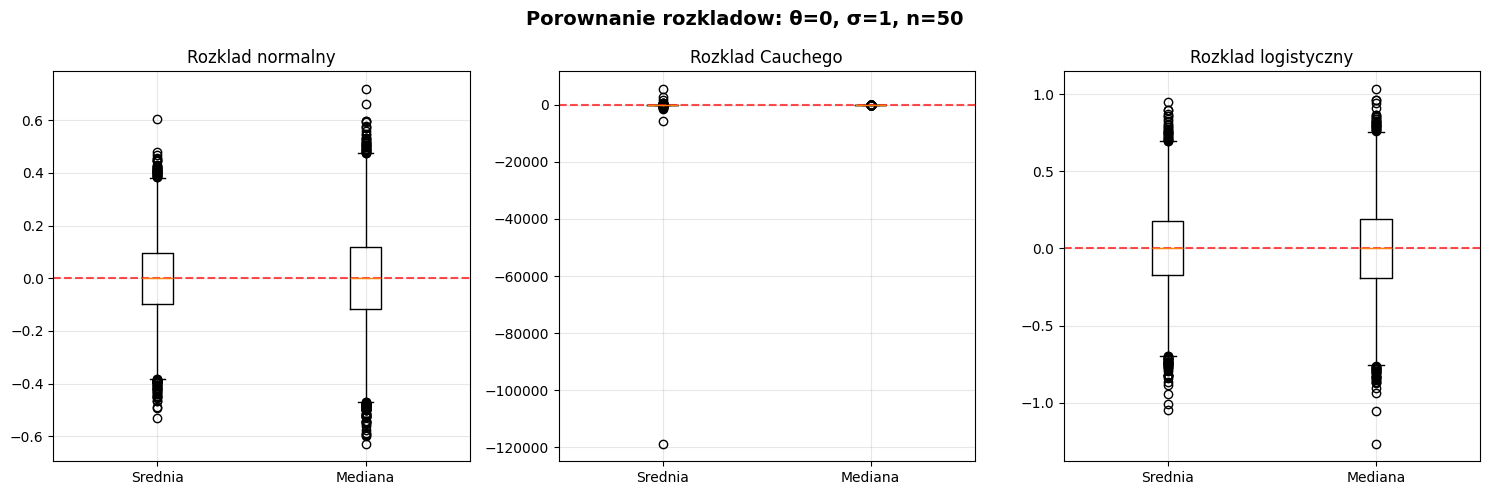

### Porownanie rozkladow dla θ=0, σ=2, n=50

### Rozklad normalny:
|        |    Mean |   Variance |    Bias |    MSE |
|:-------|--------:|-----------:|--------:|-------:|
| Mean   | -0.0046 |     0.0783 | -0.0046 | 0.0783 |
| Median | -0.0049 |     0.1215 | -0.0049 | 0.1215 |

### Rozklad Cauchego:
|        |    Mean |    Variance |    Bias |         MSE |
|:-------|--------:|------------:|--------:|------------:|
| Mean   | -6.5046 | 990191      | -6.5046 | 990233      |
| Median |  0.0078 |      0.2021 |  0.0078 |      0.2021 |

### Rozklad logistyczny:
|        |   Mean |   Variance |   Bias |    MSE |
|:-------|-------:|-----------:|-------:|-------:|
| Mean   | 0.0061 |     0.2636 | 0.0061 | 0.2636 |
| Median | 0.0017 |     0.3123 | 0.0017 | 0.3123 |


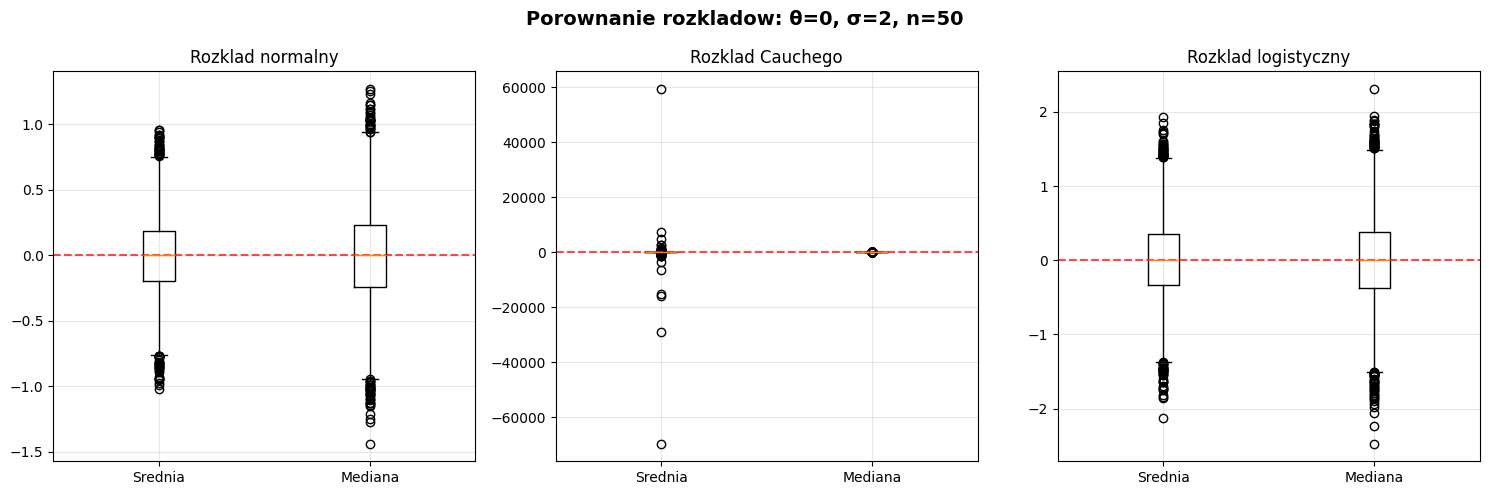

### Porownanie rozkladow dla θ=4, σ=1, n=50

### Rozklad normalny:
|        |   Mean |   Variance |   Bias |    MSE |
|:-------|-------:|-----------:|-------:|-------:|
| Mean   | 4.001  |     0.0198 | 0.001  | 0.0198 |
| Median | 4.0004 |     0.0307 | 0.0004 | 0.0307 |

### Rozklad Cauchego:
|        |    Mean |   Variance |    Bias |        MSE |
|:-------|--------:|-----------:|--------:|-----------:|
| Mean   | -1.6947 | 301046     | -5.6947 | 301079     |
| Median |  4.002  |      0.052 |  0.002  |      0.052 |

### Rozklad logistyczny:
|        |   Mean |   Variance |    Bias |    MSE |
|:-------|-------:|-----------:|--------:|-------:|
| Mean   | 3.9988 |     0.0646 | -0.0012 | 0.0646 |
| Median | 4.0002 |     0.0768 |  0.0002 | 0.0768 |


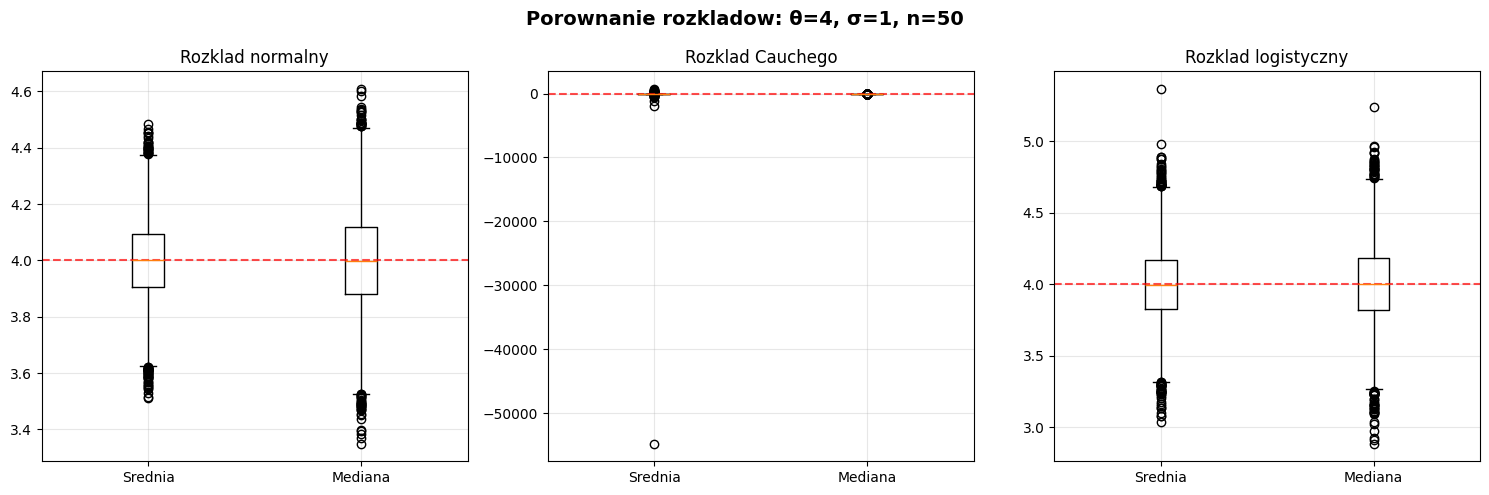

### Porownanie rozkladow dla θ=4, σ=2, n=50

### Rozklad normalny:
|        |   Mean |   Variance |    Bias |    MSE |
|:-------|-------:|-----------:|--------:|-------:|
| Mean   | 4.0025 |     0.0789 |  0.0025 | 0.0789 |
| Median | 3.9993 |     0.1214 | -0.0007 | 0.1214 |

### Rozklad Cauchego:
|        |   Mean |   Variance |    Bias |        MSE |
|:-------|-------:|-----------:|--------:|-----------:|
| Mean   | 1.3006 | 59414.7    | -2.6994 | 59422      |
| Median | 3.9975 |     0.2047 | -0.0025 |     0.2047 |

### Rozklad logistyczny:
|        |   Mean |   Variance |   Bias |    MSE |
|:-------|-------:|-----------:|-------:|-------:|
| Mean   | 4.0082 |     0.2577 | 0.0082 | 0.2578 |
| Median | 4.0111 |     0.3077 | 0.0111 | 0.3078 |


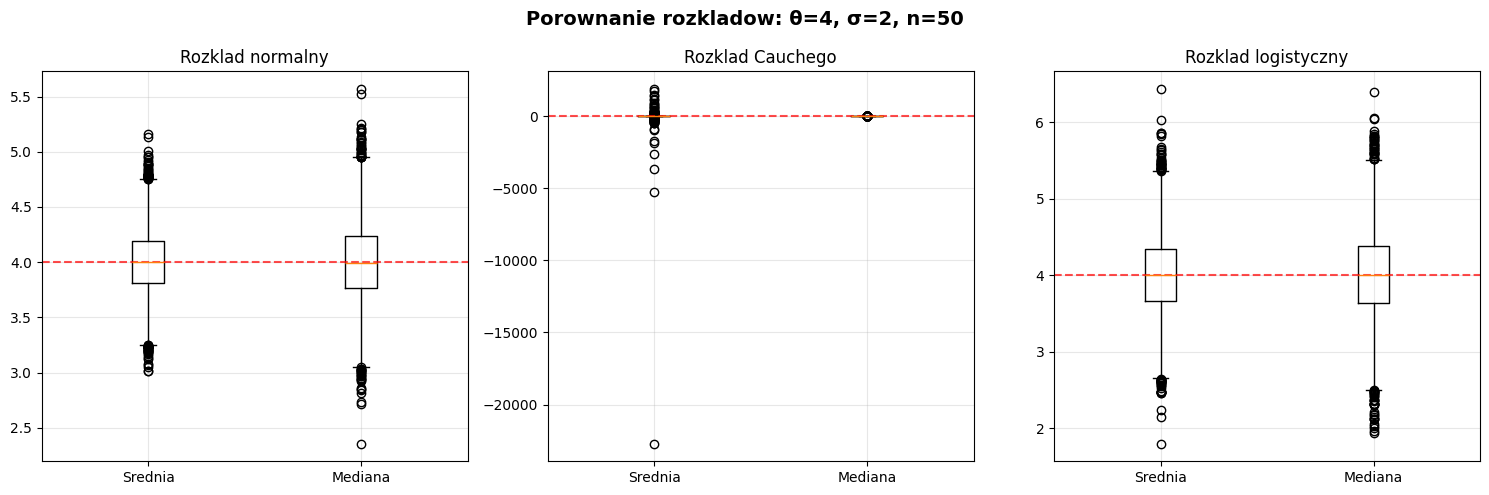

In [12]:
n = 50
thetas = [0, 0, 4, 4]
sigmas = [1, 2, 1, 2]

for theta, sigma in zip(thetas, sigmas):
    print(f"### Porownanie rozkladow dla θ={theta}, σ={sigma}, n={n}")

    results = run_distribution_comparison(theta, sigma, n, num_simulations=10000)

    # Print statistics
    print("\n### Rozklad normalny:")
    print(results['norm'][1].round(4).to_markdown())

    print("\n### Rozklad Cauchego:")
    print(results['cauchy'][1].round(4).to_markdown())

    print("\n### Rozklad logistyczny:")
    print(results['logistic'][1].round(4).to_markdown())

    # Plot boxplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].boxplot(results['norm'][0])
    axes[0].set_title('Rozklad normalny')
    axes[0].set_xticklabels(['Srednia', 'Mediana'])
    axes[0].axhline(y=theta, color='r', linestyle='--', alpha=0.7)
    axes[0].grid(True, alpha=0.3)

    axes[1].boxplot(results['cauchy'][0])
    axes[1].set_title('Rozklad Cauchego')
    axes[1].set_xticklabels(['Srednia', 'Mediana'])
    axes[1].axhline(y=theta, color='r', linestyle='--', alpha=0.7)
    axes[1].grid(True, alpha=0.3)

    axes[2].boxplot(results['logistic'][0])
    axes[2].set_title('Rozklad logistyczny')
    axes[2].set_xticklabels(['Srednia', 'Mediana'])
    axes[2].axhline(y=theta, color='r', linestyle='--', alpha=0.7)
    axes[2].grid(True, alpha=0.3)

    fig.suptitle(f'Porownanie rozkladow: θ={theta}, σ={sigma}, n={n}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Zadanie 3

In [13]:
def run_simulation3(k, theta=0, sigma=1, n=49, num_simulations=10000):
    res = []
    for _ in range(num_simulations):
        theta_hat = np.append(norm.rvs(theta, sigma, n), k)

        est_31 = np.mean(theta_hat)
        est_32 = np.median(theta_hat)
        res.append([est_31, est_32])

    columns = ['theta_hat_1', 'theta_hat_2']

    res_df = pd.DataFrame(res, columns=columns)
    stats_df = calculate_statistics(res_df, theta)

    return res_df, stats_df



### Wartosci dla k=10
|          |   theta_hat_1 |   theta_hat_2 |
|:---------|--------------:|--------------:|
| Variance |        0.0199 |        0.0315 |
| Bias     |        0.2001 |        0.0251 |
| MSE      |        0.0599 |        0.0321 |


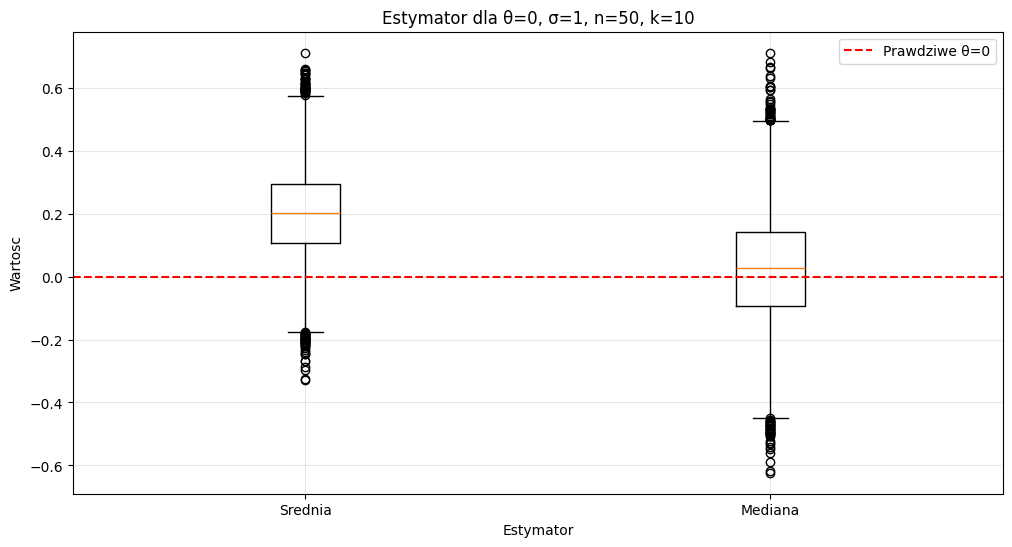


### Wartosci dla k=20
|          |   theta_hat_1 |   theta_hat_2 |
|:---------|--------------:|--------------:|
| Variance |        0.0194 |        0.0306 |
| Bias     |        0.3991 |        0.0252 |
| MSE      |        0.1787 |        0.0312 |


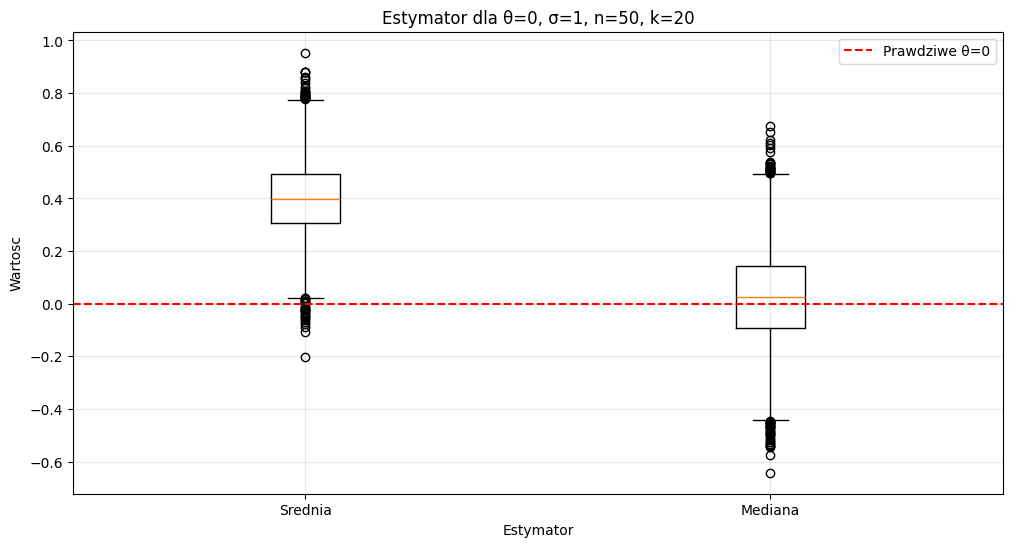


### Wartosci dla k=30
|          |   theta_hat_1 |   theta_hat_2 |
|:---------|--------------:|--------------:|
| Variance |        0.0192 |        0.0301 |
| Bias     |        0.6001 |        0.0268 |
| MSE      |        0.3793 |        0.0308 |


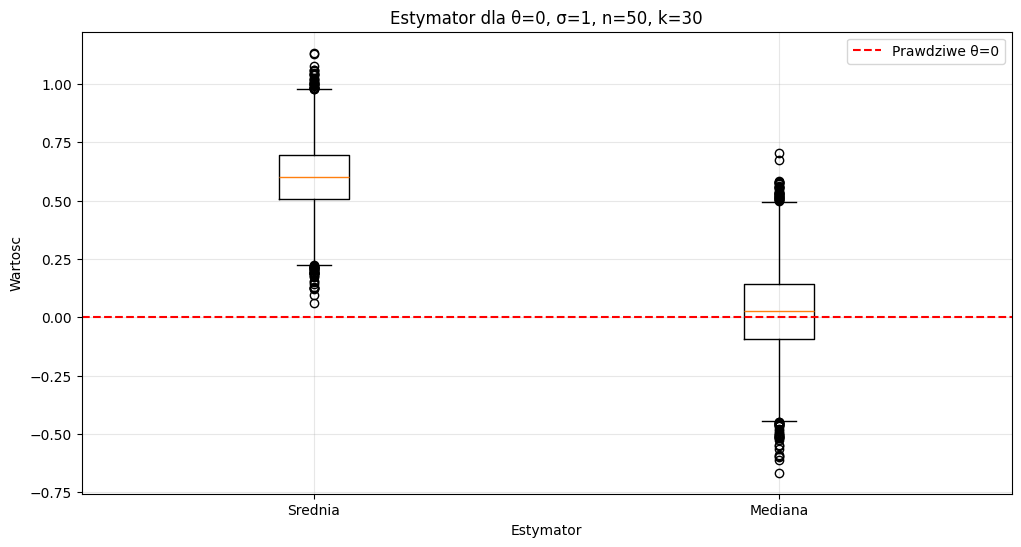


### Wartosci dla k=40
|          |   theta_hat_1 |   theta_hat_2 |
|:---------|--------------:|--------------:|
| Variance |        0.0198 |        0.0316 |
| Bias     |        0.802  |        0.0283 |
| MSE      |        0.6631 |        0.0324 |


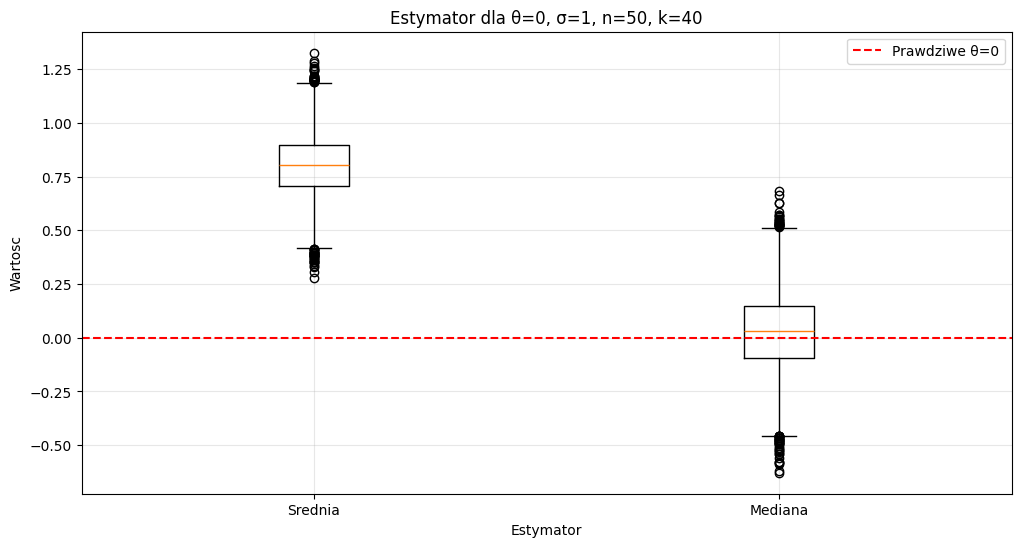


### Wartosci dla k=50
|          |   theta_hat_1 |   theta_hat_2 |
|:---------|--------------:|--------------:|
| Variance |        0.0201 |        0.0313 |
| Bias     |        0.9998 |        0.0256 |
| MSE      |        1.0196 |        0.0319 |


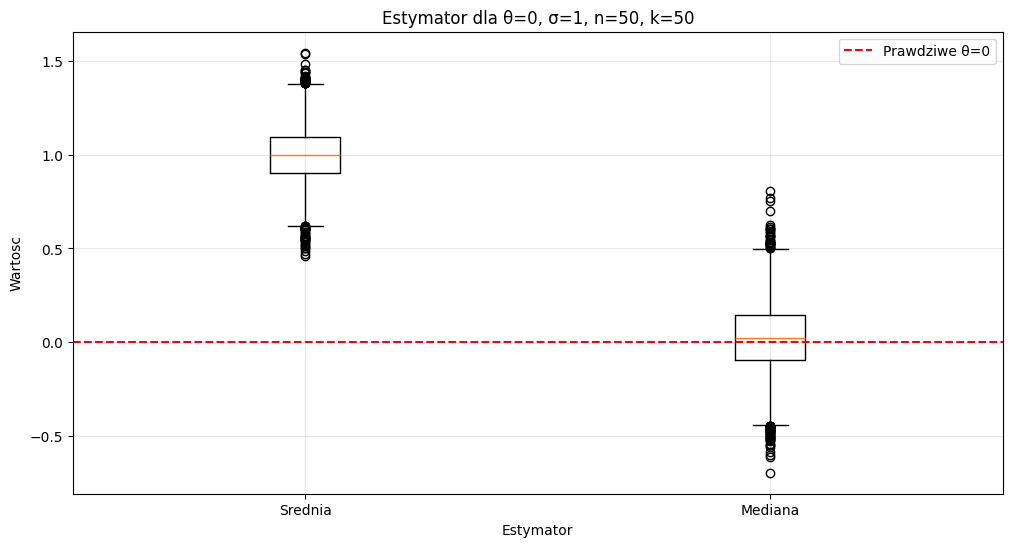


### Wartosci dla k=60
|          |   theta_hat_1 |   theta_hat_2 |
|:---------|--------------:|--------------:|
| Variance |        0.0199 |        0.0317 |
| Bias     |        1.201  |        0.0274 |
| MSE      |        1.4624 |        0.0325 |


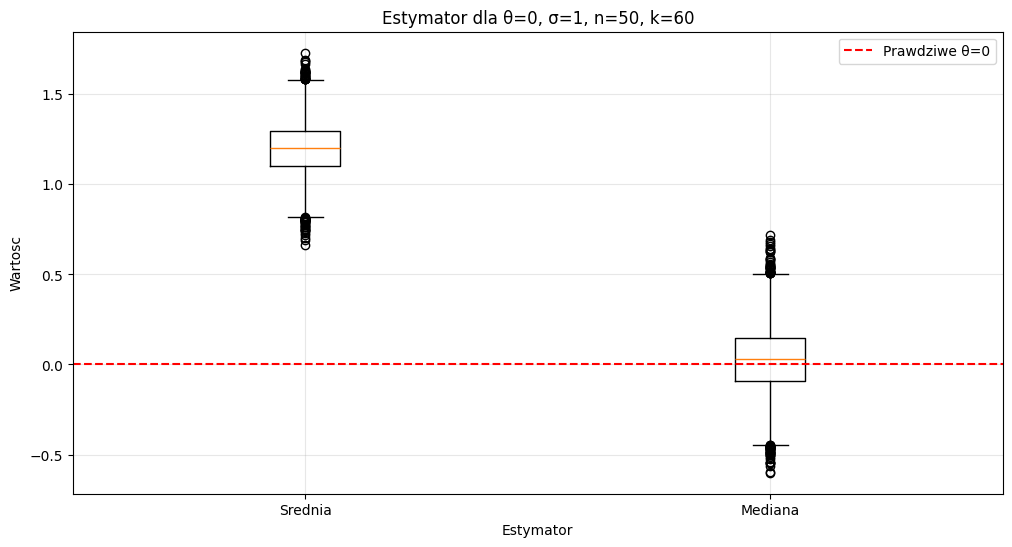


### Wartosci dla k=70
|          |   theta_hat_1 |   theta_hat_2 |
|:---------|--------------:|--------------:|
| Variance |        0.0195 |        0.0311 |
| Bias     |        1.4023 |        0.0281 |
| MSE      |        1.986  |        0.0319 |


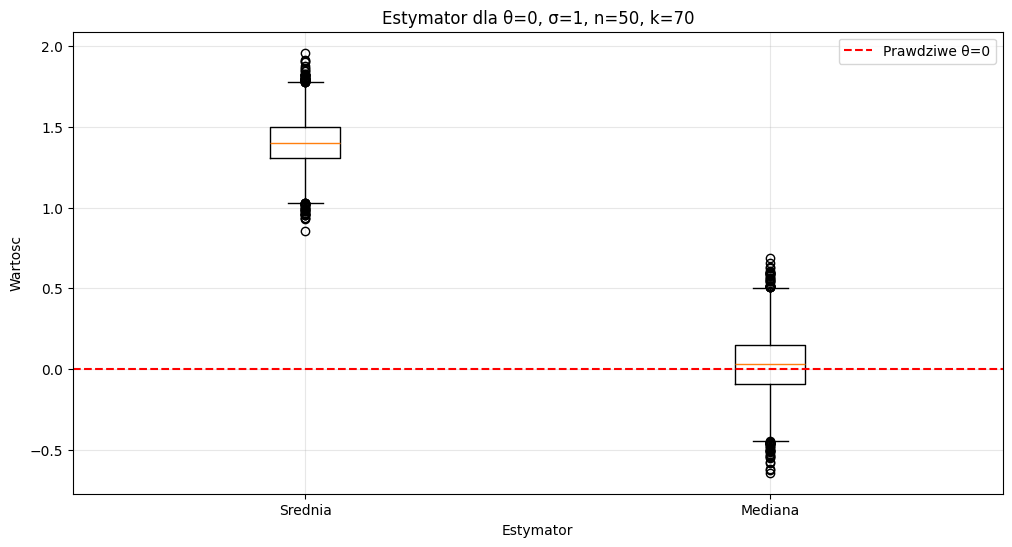


### Wartosci dla k=80
|          |   theta_hat_1 |   theta_hat_2 |
|:---------|--------------:|--------------:|
| Variance |        0.0198 |        0.031  |
| Bias     |        1.6007 |        0.0248 |
| MSE      |        2.5822 |        0.0316 |


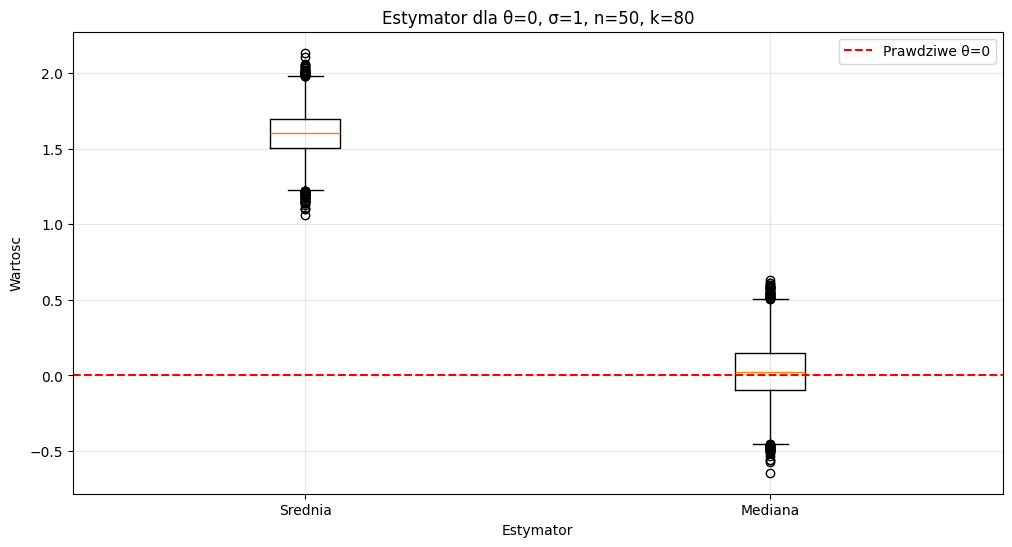


### Wartosci dla k=90
|          |   theta_hat_1 |   theta_hat_2 |
|:---------|--------------:|--------------:|
| Variance |        0.0197 |        0.0314 |
| Bias     |        1.7999 |        0.0246 |
| MSE      |        3.2594 |        0.032  |


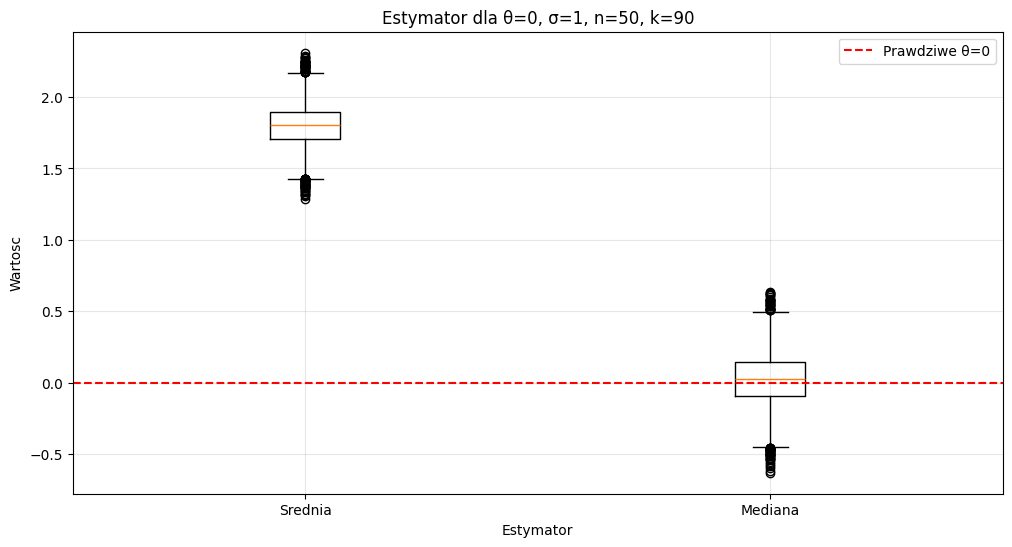


### Wartosci dla k=100
|          |   theta_hat_1 |   theta_hat_2 |
|:---------|--------------:|--------------:|
| Variance |        0.0198 |        0.0317 |
| Bias     |        2.0005 |        0.0241 |
| MSE      |        4.0218 |        0.0323 |


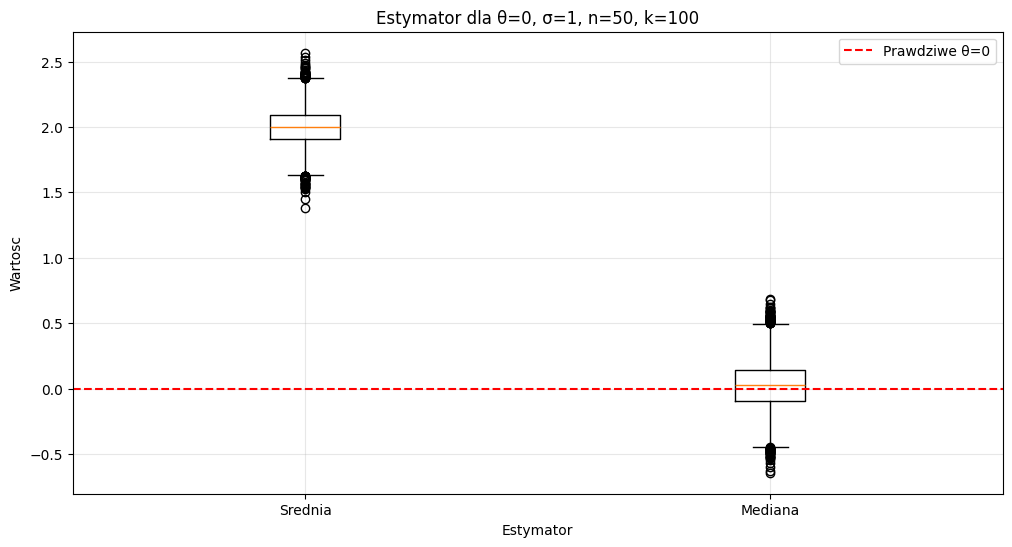

In [16]:
theta = 0
sigma = 1
n = 49

for k in range(10, 101, 10):
    res_df, stats_df = run_simulation3(k, theta=theta, sigma=sigma, n=n, num_simulations=10000)

    print(f'\n### Wartosci dla k={k}')
    print(stats_df.round(4).to_markdown())

    # Plot boxplot
    plt.figure(figsize=(12, 6))
    plt.boxplot(res_df)
    plt.title(f'Estymator dla θ={theta}, σ={sigma}, n={n + 1}, k={k}')
    plt.xlabel('Estymator')
    plt.ylabel('Wartosc')
    plt.axhline(y=theta, color='r', linestyle='--', label=f'Prawdziwe θ={theta}')
    plt.gca().set_xticklabels(['Srednia', 'Mediana'])
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Zadanie 4

In [18]:
def est_41(theta_hat, n):
    return np.sum((theta_hat - np.mean(theta_hat)) ** 2) / (n - 1)

def est_42(theta_hat, n):
    return np.sum((theta_hat - np.median(theta_hat)) ** 2) / (n - 1)

def est_43(theta_hat):
    return np.median((theta_hat - np.mean(theta_hat)) ** 2)

In [19]:
def run_simulation4(theta, sigma, n, num_simulations=10000):
    """
    Run simulation for given parameters and return results with statistics
    """
    res = []

    for _ in range(num_simulations):
        theta_hat = norm.rvs(theta, sigma, n)

        res.append([
            est_41(theta_hat, n),
            est_42(theta_hat, n),
            est_43(theta_hat, n),
        ])

    columns = ['Est1', 'Est2', 'Est3']

    res_df = pd.DataFrame(res, columns=columns)
    stats_df = calculate_statistics(res_df, sigma**2)

    return res_df, stats_df


### Wartosci dla n=50, θ=0, σ=1:
|          |   Est1 |   Est2 |    Est3 |
|:---------|-------:|-------:|--------:|
| Variance | 0.0419 | 0.0431 |  0.0229 |
| Bias     | 0.0007 | 0.0115 | -0.5349 |
| MSE      | 0.0419 | 0.0432 |  0.309  |


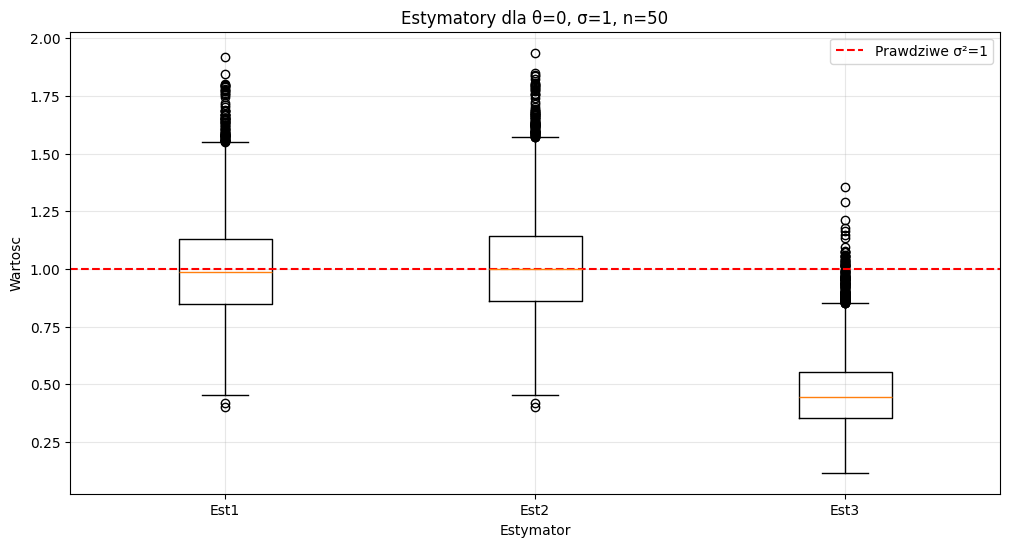


### Wartosci dla n=50, θ=0, σ=4:
|          |    Est1 |    Est2 |    Est3 |
|:---------|--------:|--------:|--------:|
| Variance | 10.4258 | 10.71   |  5.6677 |
| Bias     | -0.0201 |  0.1535 | -8.5855 |
| MSE      | 10.4262 | 10.7336 | 79.3777 |


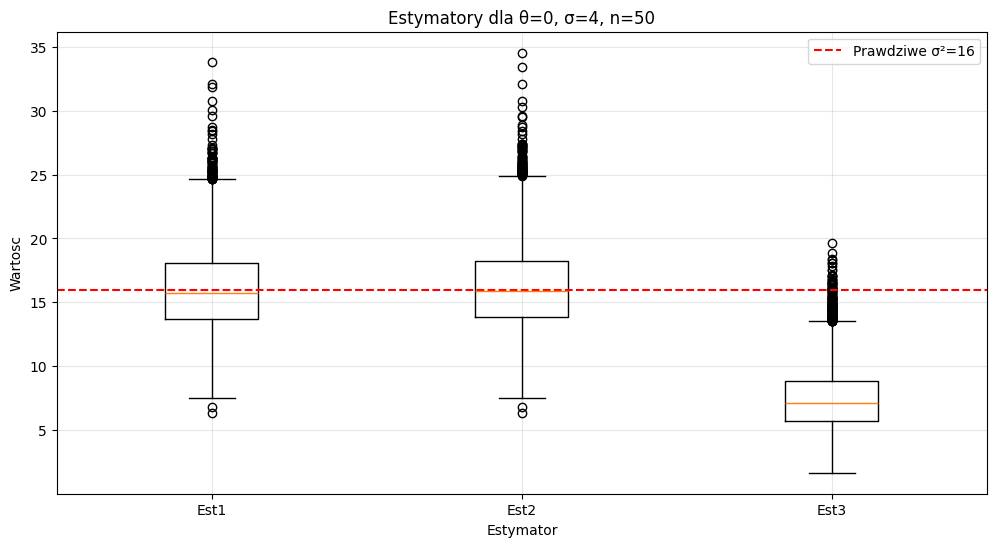


### Wartosci dla n=50, θ=4, σ=1:
|          |   Est1 |   Est2 |    Est3 |
|:---------|-------:|-------:|--------:|
| Variance | 0.0414 | 0.0425 |  0.0219 |
| Bias     | 0.0036 | 0.0142 | -0.5364 |
| MSE      | 0.0414 | 0.0427 |  0.3096 |


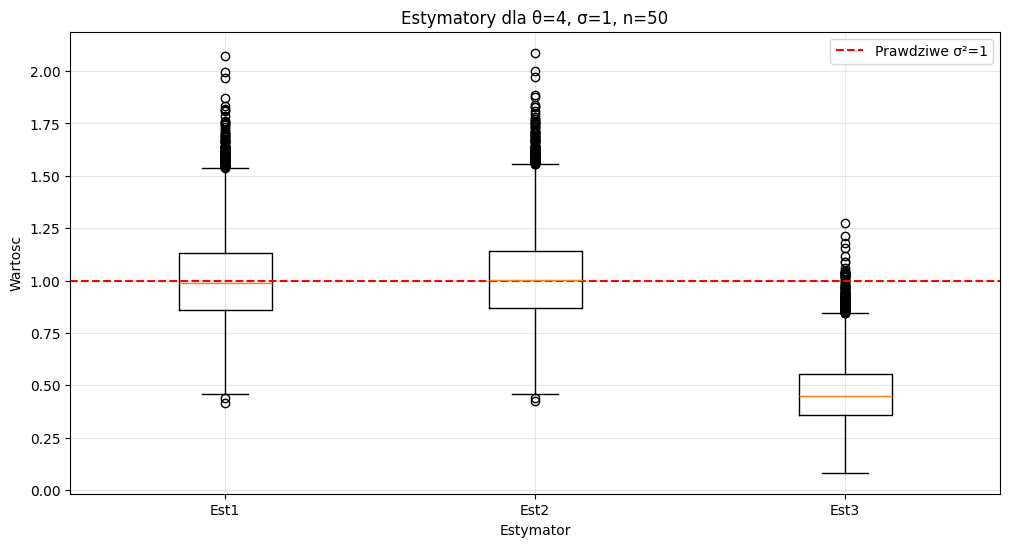


### Wartosci dla n=50, θ=4, σ=4:
|          |    Est1 |    Est2 |    Est3 |
|:---------|--------:|--------:|--------:|
| Variance | 10.7515 | 11.0363 |  5.8963 |
| Bias     | -0.0424 |  0.1323 | -8.5886 |
| MSE      | 10.7533 | 11.0538 | 79.6608 |


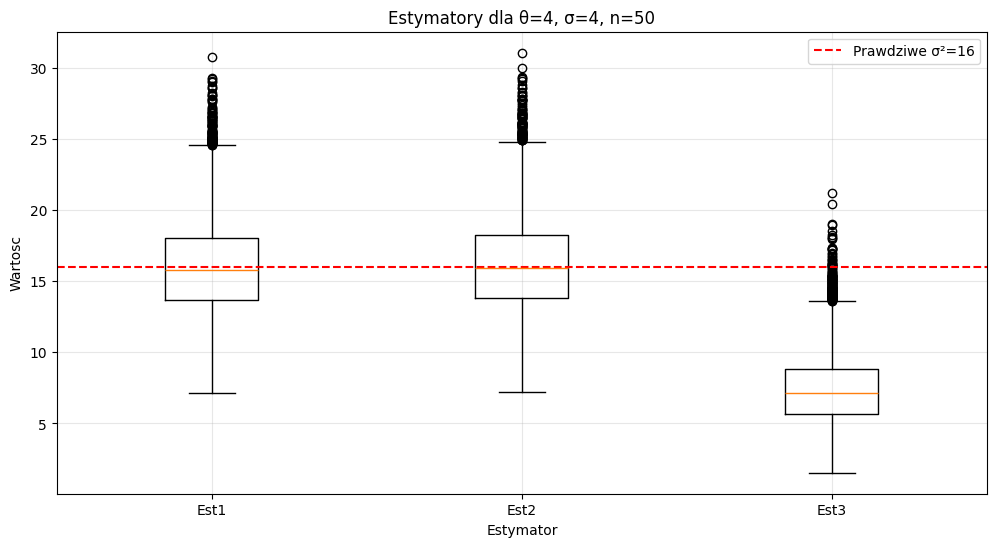

In [22]:
n = 50
thetas = [0, 0, 4, 4]
sigmas = [1, 4, 1, 4]

for i in range(4):
    theta, sigma = thetas[i], sigmas[i]
    res_df, stats_df = run_simulation4(theta, sigma, n, num_simulations=10000)

    print(f"\n### Wartosci dla n={n}, θ={theta}, σ={sigma}:")
    print(stats_df.round(4).to_markdown())

    # Plot boxplot
    plt.figure(figsize=(12, 6))
    plt.boxplot(res_df)
    plt.title(f'Estymatory dla θ={theta}, σ={sigma}, n={n}')
    plt.xlabel('Estymator')
    plt.ylabel('Wartosc')
    plt.axhline(y=sigma**2, color='r', linestyle='--', label=f'Prawdziwe σ²={sigma**2}')
    plt.gca().set_xticklabels(res_df.columns)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
